**IMPORTS**

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly
from prophet import Prophet
from CreateCsv import get_df, getpartialcsv

**API**

Note that every graph has been plotted starting from the "PriceUSD" column of the "btc.csv" file 

Creation of data frame

In [46]:
df = pd.read_csv('btc.csv')
df = df[['time','PriceUSD']]
df.columns = ['ds', 'y']

df.tail()

,ds,y
4841,2022-04-06,43304.937199
4842,2022-04-07,43569.047170
4843,2022-04-08,42222.068977
4844,2022-04-09,42680.994736
4845,2022-04-10,NaN


We fit the model by instantiating a new Prophet object

In [32]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Creates a new data frame called "future" and it creates a column named "ds" containing all the dates of the previous df plus one more month

In [33]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5206,2023-04-06
5207,2023-04-07
5208,2023-04-08
5209,2023-04-09
5210,2023-04-10


Cretaion of columns "yhat", "yhat_lower", "yhat_upper" in a new data frame called "forecast" for the predicted values, components and uncertainty intervals 

In [34]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
5206,2023-04-06,78326.531228,71549.291173,85176.083227
5207,2023-04-07,78420.425708,71718.950712,84947.766302
5208,2023-04-08,78524.974789,71871.618495,85230.737688
5209,2023-04-09,78631.575527,72020.454239,85041.825102
5210,2023-04-10,78738.293072,72288.672805,85385.763237


Plotting predictions

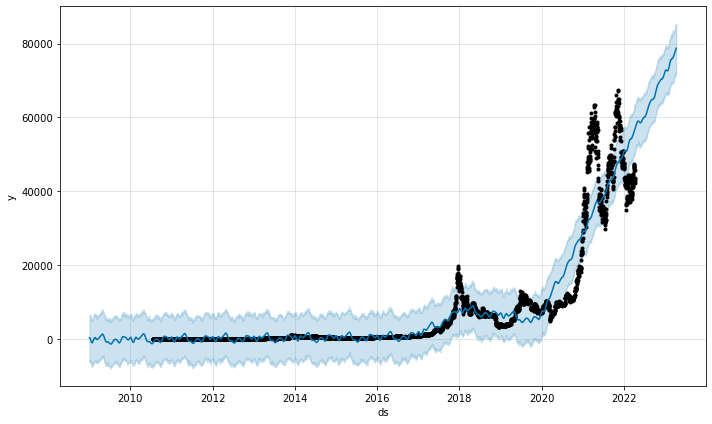

In [35]:
fig1 = m.plot(forecast)

Plotting components by specific time

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



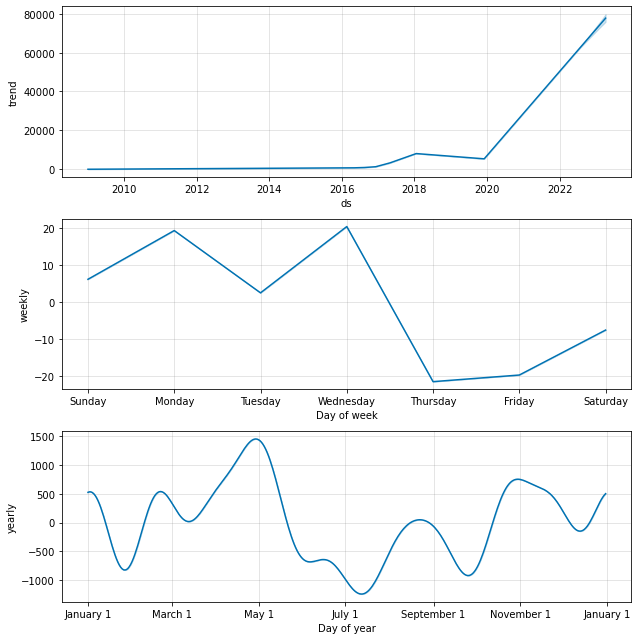

In [36]:
fig2 = m.plot_components(forecast)

Same plots as before on an interactive figure

In [37]:
plot_plotly(m, forecast)

components plot on an interactif figure

In [43]:
plot_components_plotly(m, forecast)

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



**CHANGE POINTS**

Plot with change points

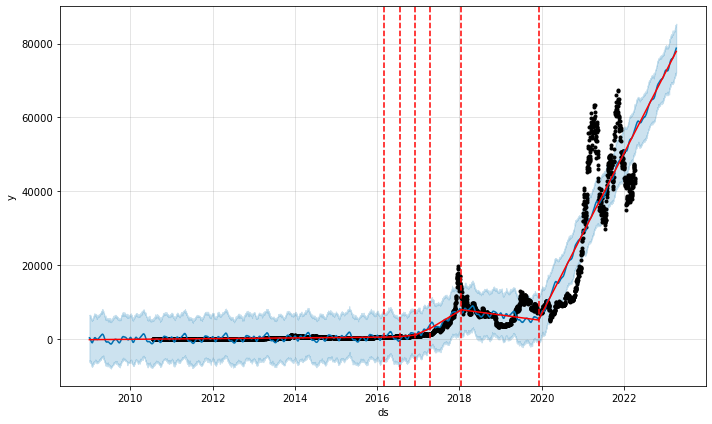

In [39]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Setting a parametre to avoid any problem of overlifting and of underlifting

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



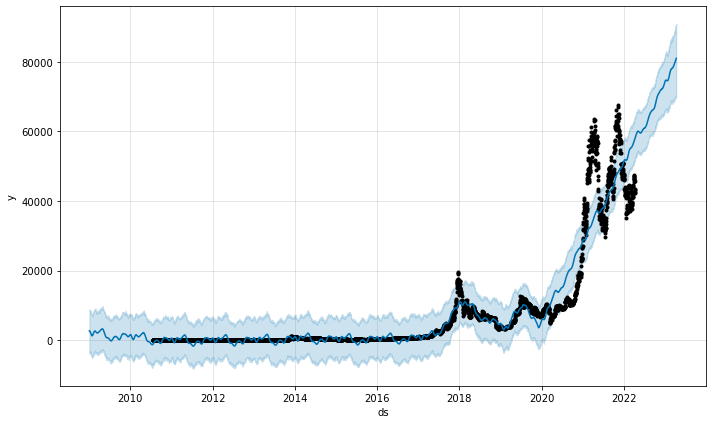

In [40]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Very low flexibility

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



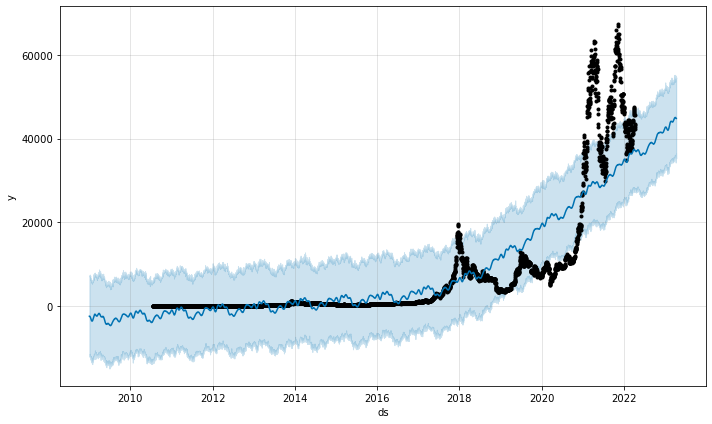

In [41]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

Plotting on a specific time period

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\maxba\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



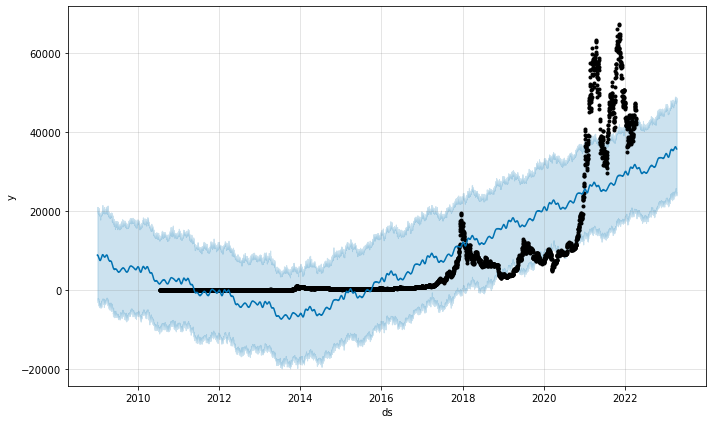

In [42]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)